In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


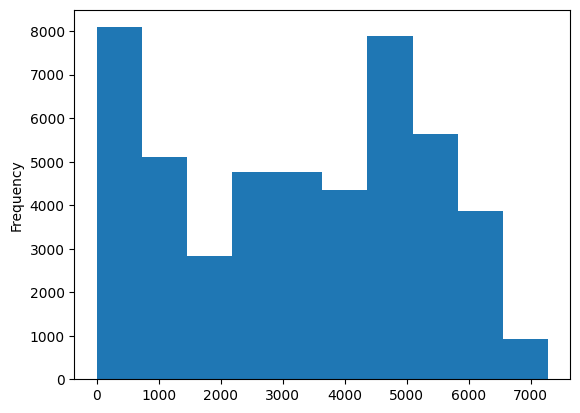

In [4]:
i94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print(day.shape)
night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


In [7]:
day['date_time'].unique()

<DatetimeArray>
['2012-10-02 09:00:00', '2012-10-02 10:00:00', '2012-10-02 11:00:00',
 '2012-10-02 12:00:00', '2012-10-02 13:00:00', '2012-10-02 14:00:00',
 '2012-10-02 15:00:00', '2012-10-02 16:00:00', '2012-10-02 17:00:00',
 '2012-10-02 18:00:00',
 ...
 '2018-09-30 09:00:00', '2018-09-30 10:00:00', '2018-09-30 11:00:00',
 '2018-09-30 12:00:00', '2018-09-30 13:00:00', '2018-09-30 14:00:00',
 '2018-09-30 15:00:00', '2018-09-30 16:00:00', '2018-09-30 17:00:00',
 '2018-09-30 18:00:00']
Length: 20150, dtype: datetime64[ns]

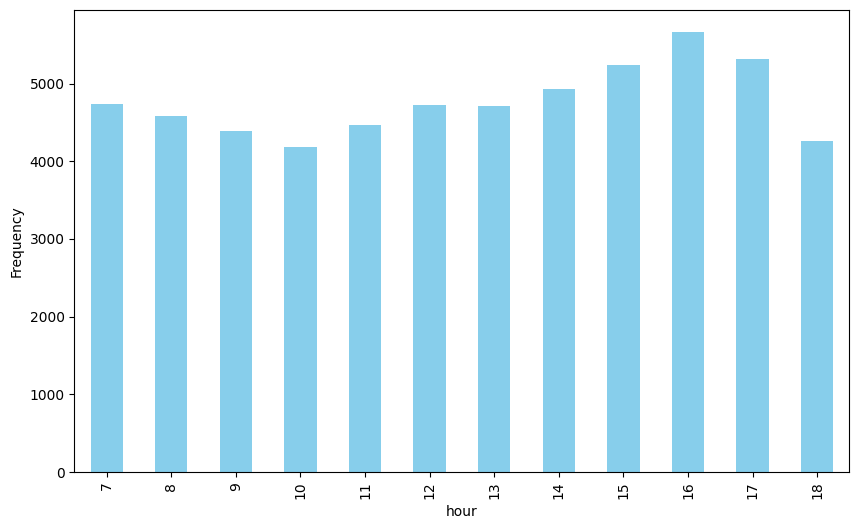

In [8]:
day['hour'] = day['date_time'].dt.hour
hourly_traffic = day.groupby('hour')['traffic_volume'].mean()
plt.figure(figsize=(10,6))
hourly_traffic.plot(kind='bar', color='skyblue')
plt.ylabel('Frequency')
plt.show()

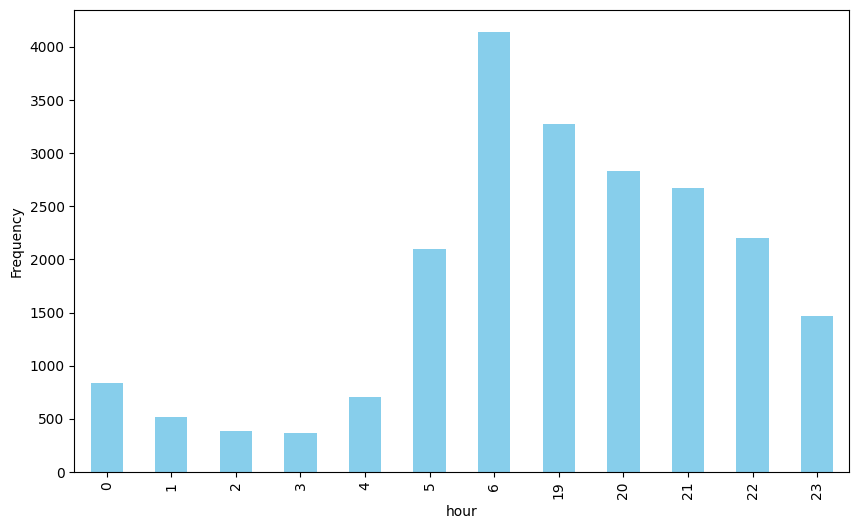

In [9]:
night['hour'] = night['date_time'].dt.hour
hourly_traffic = night.groupby('hour')['traffic_volume'].mean()
plt.figure(figsize=(10,6))
hourly_traffic.plot(kind='bar', color='skyblue')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

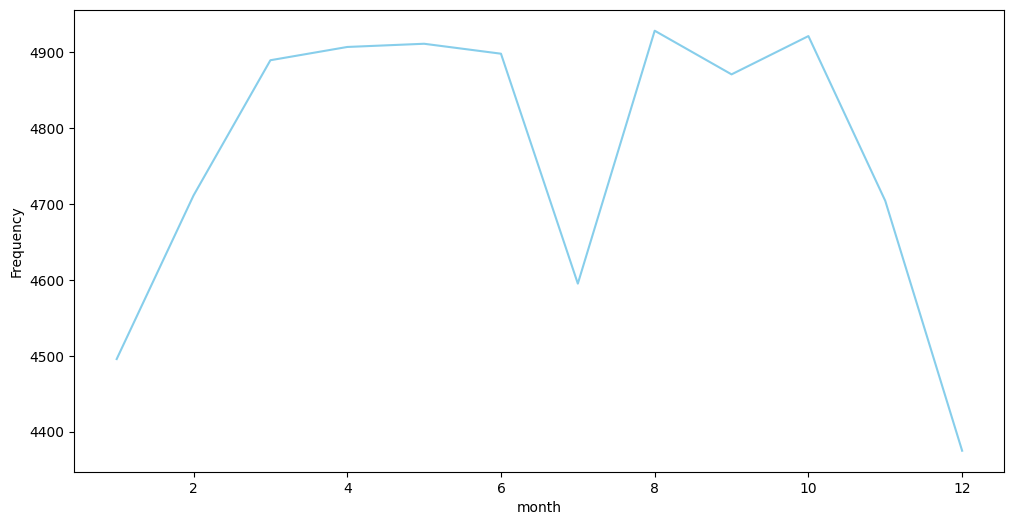

In [19]:
day['month'] = day['date_time'].dt.month
monthly_traffic = day.groupby('month')['traffic_volume'].mean()
plt.figure(figsize=(12,6))
monthly_traffic.plot(kind='line',color='skyblue')
plt.ylabel('Frequency')
plt.show

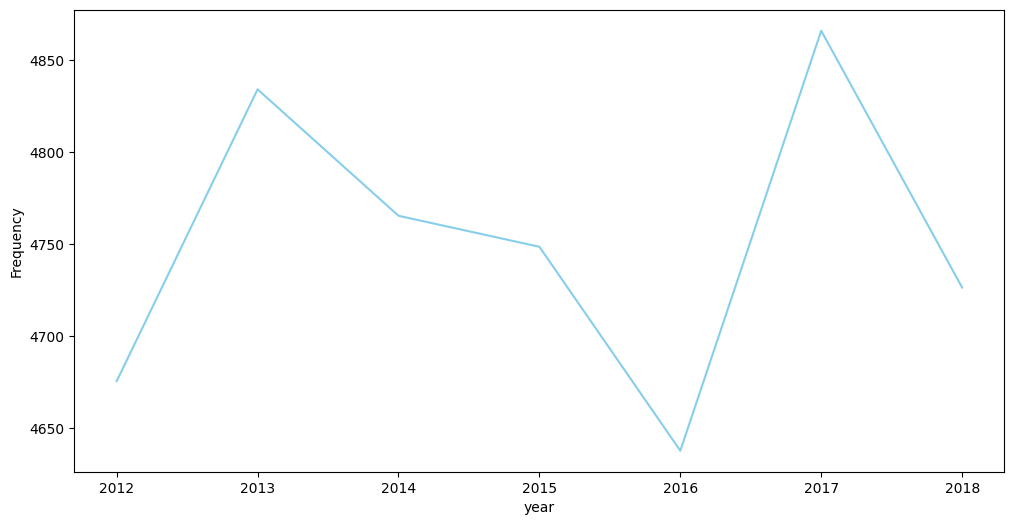

In [26]:
day['year'] = day['date_time'].dt.year
yearly_traffic = day.groupby('year')['traffic_volume'].mean()
plt.figure(figsize=(12,6))
yearly_traffic.plot(kind='line',color='skyblue')
plt.ylabel('Frequency')
plt.show()

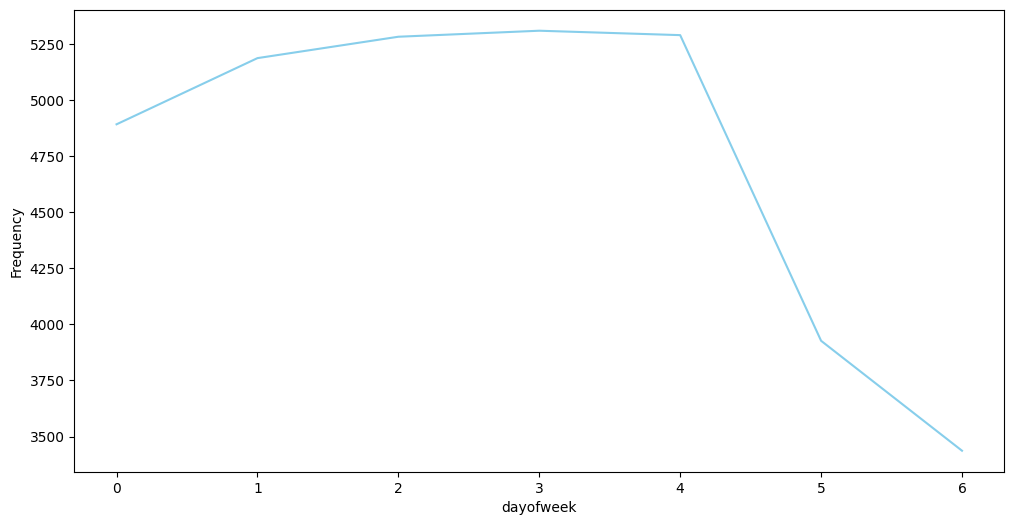

In [39]:
day['dayofweek'] = day['date_time'].dt.dayofweek
day_traffic = day.groupby('dayofweek')['traffic_volume'].mean()
plt.figure(figsize=(12,6))
day_traffic.plot(kind='line',color='skyblue')
plt.ylabel('Frequency')
plt.show()

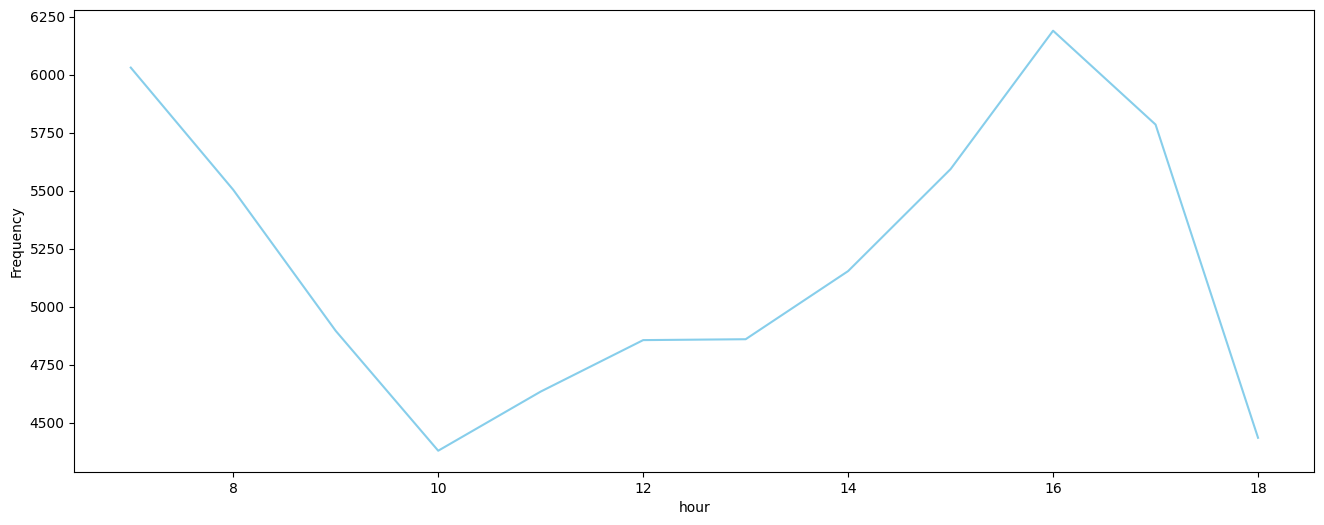

In [47]:
workdays = day[day['dayofweek']<=4]
workday_data = workdays.groupby('hour')['traffic_volume'].mean()
plt.figure(figsize=(16,6))
workday_data.plot(kind='line',color='skyblue')
plt.ylabel('Frequency')
plt.show()

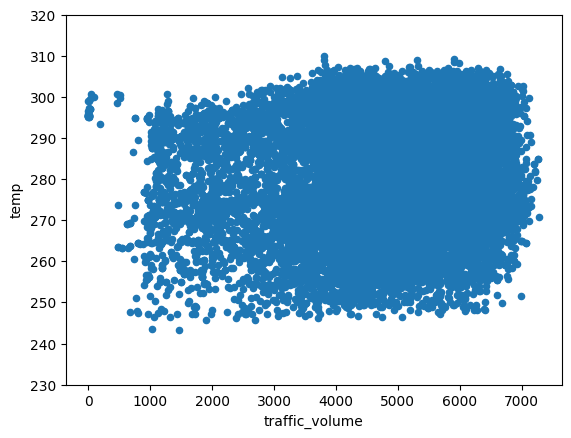

In [49]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()